## Practice: It Takes Two to Taxi

In this practice assignment, we'll explore a [dataset of taxi trips in NYC](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page) and a [dataset of medical costs](https://www.kaggle.com/mirichoi0218/insurance).

### Set-Up

Once again, let's imagine that we're building a new NYC transportation app and want to better understand how travelers are currently using taxi services. Using a dataset of taxi trips from the last 30 days, we'll explore some of the relationships between variables to answer questions such as:

- Do passengers who are dropped off in different boroughs (locations in NYC) use different forms of payment?
- What is the relationship between the distance traveled and the fare? Are there situations when the same distance trip could result in very different fares?
- Do passengers who are picked up in different boroughs travel different distances on average?

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('The libraries are loaded')

Matplotlib is building the font cache; this may take a moment.


The libraries are loaded


In [2]:
# Load data
taxis = pd.read_csv('taxis.csv')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


### Two Categorical Variables
Depending on the type of data we have, we'll need different summary statistics and data visualizations to investigate relationships. 

If we're interested in the relationship between two categorical columns, we can use a contingency table or side by side bar graph. For example, let's check whether there's a relationship between the `dropoff_borough` and `payment`.

In [3]:
# Create a contingency table of dropoff_borough and payment
pd.crosstab(taxis.dropoff_borough, taxis.payment)

payment,cash,credit card
dropoff_borough,,
Bronx,52,84
Brooklyn,153,344
Manhattan,1361,3815
Queens,230,304
Staten Island,0,2


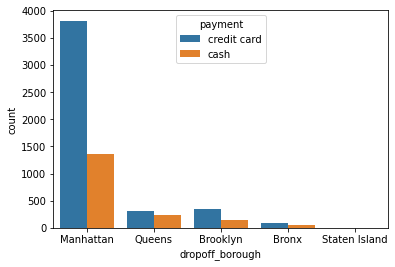

In [4]:
# Visualize this
sns.countplot(x='dropoff_borough', hue='payment', data=taxis)
plt.show()

<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**What is the relationship between `pickup_borough` and `color` of the cab? Create a contingency table and side by side bar chart to illustrate this relationship.**

In [5]:
# Create a contingency table of dropoff_borough and color
###
pd.crosstab(taxis.dropoff_borough, taxis.color)
###


color,green,yellow
dropoff_borough,,
Bronx,95,42
Brooklyn,259,242
Manhattan,343,4863
Queens,276,266
Staten Island,0,2


<AxesSubplot:xlabel='dropoff_borough', ylabel='count'>

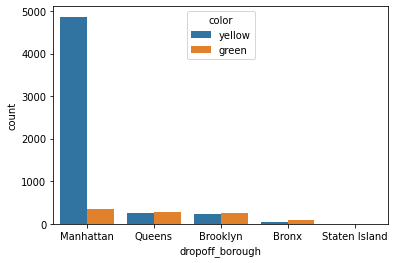

In [6]:
# Visualization
###
sns.countplot(x='dropoff_borough', hue='color', data=taxis)
###


<hr style="border:2px solid gray"> </hr>

### One Categorical Variable and One Quantitative Variable
If we're interested in the relationship between a categorical variable and a quantitative variable, we can use mean or median differences and side-by-side box plots or overlapping distribution plots. For example, let's investigate whether there's a relationship between payment type and fare: do people tend to pay for low fares differently than high fares?

To answer this, we'll start by printing the mean fare for each payment type. We can do this using the pandas `.groupby()` method.

[Resource on `.groupby()`](https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/)

In [7]:
# Calculate mean fare for each borough
taxis.groupby('payment').mean().fare

payment
cash           11.592991
credit card    13.694750
Name: fare, dtype: float64

This tells us that people who pay with a credit card have fares that are $2.10 higher on average than people who pay cash.

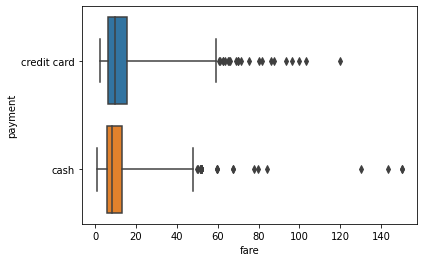

In [8]:
# Visualize with side by side box plots
sns.boxplot(x = 'fare', y = 'payment', data = taxis, whis = 5)
plt.show()

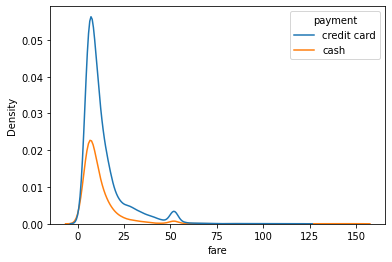

In [9]:
# Visualize with overlapping KDE plots
sns.kdeplot(x = 'fare', hue = 'payment', data = taxis)
plt.show()

People who paid with cash had slightly lower fares, but the differences seem to be relatively small.

<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**What is the relationship between `pickup_borough` and `distance` traveled? Create a table showing the median distance traveled by pickup borough. Then, visualize this using side by side box plots.**

Which pick-up location is associated with the longest trips on average?

In [10]:
# Calculate median distance traveled by pickup_borough
###
taxis.groupby('pickup_borough').median().distance
###


pickup_borough
Bronx        4.0
Brooklyn     2.6
Manhattan    1.5
Queens       6.1
Name: distance, dtype: float64

<AxesSubplot:xlabel='distance', ylabel='pickup_borough'>

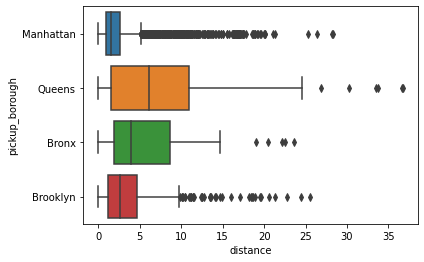

In [11]:
# Visualization
###
sns.boxplot(x = 'distance', y = 'pickup_borough', data = taxis)
###


<AxesSubplot:xlabel='distance', ylabel='Density'>

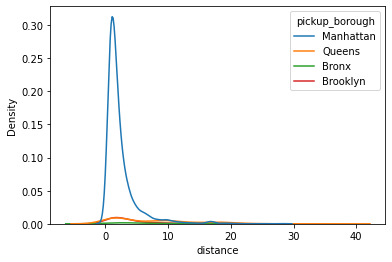

In [12]:
sns.kdeplot(x = 'distance', hue = 'pickup_borough', data = taxis)

<hr style="border:2px solid gray"> </hr>

### Two Quantitative Variables

For investigating the relationship between two quantitative variables, we can use summary statistics such as covariance or Pearson correlation and visualizations such as scatter plots or heatmaps.

For example, let's investigate the relationship between distance traveled and the fare. Are there situations when the same distance trip could result in very different fares?

In [13]:
# Calculate covariance and correlation between distance and fare
print('Covariance: ')
print(taxis.distance.cov(taxis.fare))
print('Correlation: ')
print(taxis.distance.corr(taxis.fare))

Covariance: 
40.68603121019049
Correlation: 
0.920107702789575


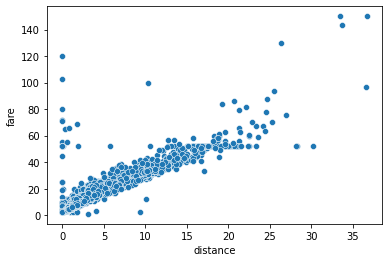

In [14]:
# Create a scatter plot
sns.scatterplot(x = 'distance', y = 'fare', data = taxis)
plt.show()

There's a pretty clear linear relationship between distance and fare, with some interesting outliers. For example, there's a 10 mile trip that cost less than 5 dollars and a 0 mile trip that cost 120 dollars. Those datapoints might be interesting to track down.

In [15]:
# Print rows for trips that were less than one mile and cost more than 100
taxis[(taxis.distance < 1) & (taxis.fare > 100)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.5,166.00,yellow,credit card,NaN,NaN,NaN,NaN
3644,2019-03-19 23:30:50,2019-03-19 23:32:33,2,0.0,103.0,20.65,0.0,123.95,yellow,credit card,NaN,NaN,NaN,NaN


It looks like there may be some errors in these rows. Both have missing pickup/dropoff locations. The first trip only lasted about 20 seconds, but apparently cost 12.5 dollars in tolls. This seems non-sensical!

<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**What is the relationship between `tip` and `distance` traveled? Calculate the correlation for these two columns, then create a scatter plot to visually inspect the relationship.**

In [17]:
# Calculate the correlation between tip and distance
###
taxis['tip'].corr(taxis['distance'])
###


0.4525886565083941

<AxesSubplot:xlabel='distance', ylabel='tip'>

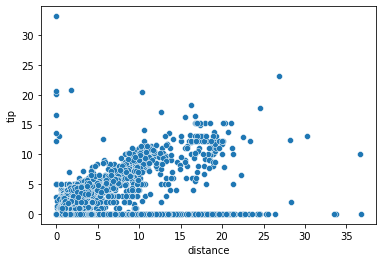

In [18]:
# Create a scatter plot of tip vs. distance
###
sns.scatterplot(x = 'distance' , y = 'tip' , data = taxis)
###


<hr style="border:2px solid gray"> </hr>

### Correlation Matrix

To see the correlation between all pairs of quantitative variables at once, we can look at a correlation matrix.

In [19]:
# Correlation matrix
taxis.corr()

,passengers,distance,fare,tip,tolls,total
passengers,1.000000,0.009411,0.007637,0.021099,-0.002903,0.015708
distance,0.009411,1.000000,0.920108,0.452589,0.635267,0.904676
fare,0.007637,0.920108,1.000000,0.488612,0.609307,0.974358
tip,0.021099,0.452589,0.488612,1.000000,0.413619,0.646186
tolls,-0.002903,0.635267,0.609307,0.413619,1.000000,0.683142
total,0.015708,0.904676,0.974358,0.646186,0.683142,1.000000


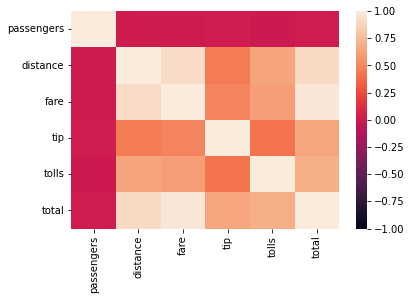

In [20]:
# Visualize the correlation matrix with a heat map
sns.heatmap(taxis.corr(), vmin=-1, vmax=1)
plt.show()

We see that the passengers variable has near zero correlation with all of the other variables. The `fare` and `total` variables are the most highly correlated, which makes sense because `total` is just `fare` + `tip`. 

<hr style="border:2px solid gray"> </hr>

#### YOU TRY
**Try replotting the heatmap from above, but with the correlation values printed on top of each square. You can do this by setting the `annot` parameter in `sns.heatmap()` equal to `True`.**

<AxesSubplot:>

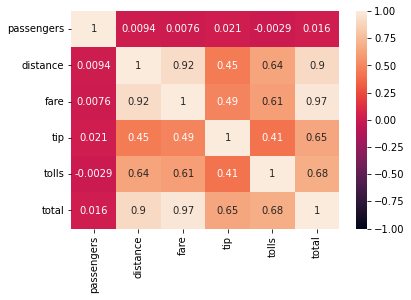

In [21]:
# Annotated correlation matrix
###
sns.heatmap(taxis.corr(), vmin=-1, vmax=1,annot = True)
###


<hr style="border:2px solid gray"> </hr>

### Multivariate Relationships

Sometimes, we want to visualize relationships between more than two variables at once. We can do this in a few ways; for example, by using additional visual cues such color, shape, opacity, and size in a plot. We can also visualize many pairwise relationships at once using a pairplot.

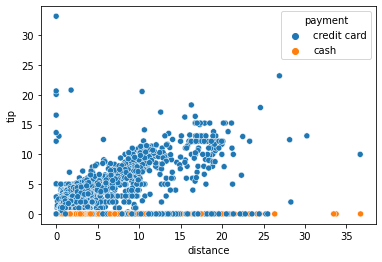

In [22]:
# Visualize relationships between distance, tip, and payment type
sns.scatterplot(x = 'distance', y = 'tip', hue = 'payment', data = taxis)
plt.show()

Notice that it becomes immediately apparent that there is a strong relationship between distance traveled and tip for riders who paid with credit card; however, all riders who paid with cash did not tip (so there is no relationship between distance traveled and tip for cash-payers). 

It might be interesting to investigate why that is happening! Are cash tips not being recorded for some reason? Are there prompts on the credit card reader that encourage people to tip?

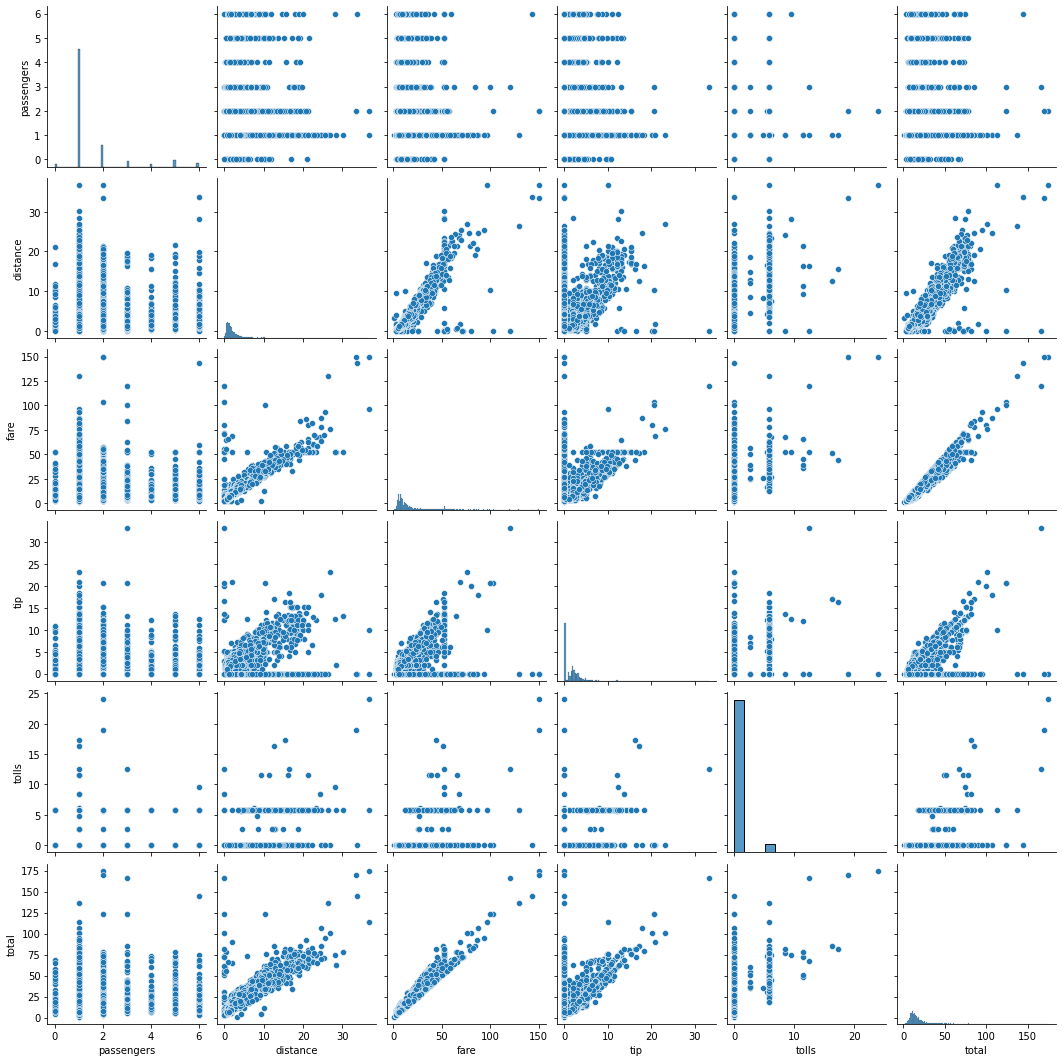

In [23]:
# Create a pair plot of all quant data
sns.pairplot(taxis)
plt.show()

Scanning these plots gives us some interesting things to investigate further. For example, the plot of `tip` vs. `fare` has a line of points in it that we may want to investigate.

<hr style="border:2px solid gray"> </hr>

#### YOU TRY
**Create a plot of `tip` vs. `fare` where the points are colored by the `color` of the taxi.**

<AxesSubplot:xlabel='tip', ylabel='fare'>

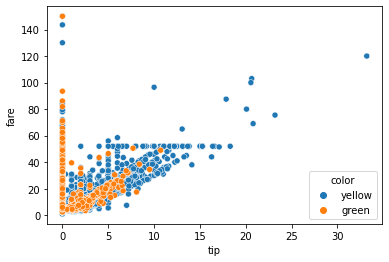

In [24]:
# Create a plot of tip vs. fare with points colored by color of the taxi
###
sns.scatterplot(x='tip' , y = 'fare' , hue = 'color' , data = taxis)
###


<hr style="border:2px solid gray"> </hr>

### Other Kinds of Data: Timeseries

For other kinds of data, we may need to rely on different visualizations and summary statistics to explore trends. For example, when exploring timeseries data, we may use a line plot for visualizing trends over time.

In order to more easily work with dates and times in pandas, it's helpful to first convert date/time columns into the pandas datetime Dtype.

In [25]:
# Convert pickup times to the pandas datetime Dtype
taxis.loc[:,'pickup'] = pd.to_datetime(taxis['pickup'])

In [26]:
# Save the day of the pickup as a new column called pickup_day
taxis.loc[:,'pickup_day'] = taxis.pickup.dt.day

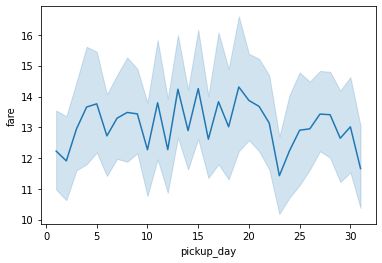

In [27]:
# Plot a line plot of mean fares by day of the month
sns.lineplot(x='pickup_day', y='fare', data=taxis)
plt.show()

We see that fares appear relatively stable throughout the month, with a few peaks and dips. We might want to check why fares were seemingly lower on average on March 23rd.

<hr style="border:2px solid gray"> </hr>

#### YOU TRY
**Create a line plot showing mean distance traveled by day of the month. Do the trends look similar to the above plot of fares throughout the month? Are there any days where the trends diverge?**

<AxesSubplot:xlabel='pickup_day', ylabel='distance'>

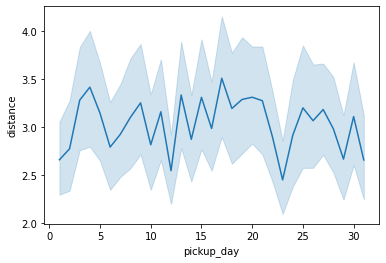

In [28]:
# Plot a line plot of mean distance by day of the month
###
sns.lineplot(x='pickup_day', y='distance', data=taxis)
###


<hr style="border:2px solid gray"> </hr>

## Practice on Your Own

Complete the following prompts to practice your skills. 

We've loaded some new data for you that includes information about [medical costs](https://www.kaggle.com/mirichoi0218/insurance). Your job will be to investigate this data to better understand some of the factors that may contribute to high or low medical costs.

In [29]:
# Load data as medcosts
medcosts = pd.read_csv('insurance.csv')
medcosts.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 1. Do smoking rates differ by region? Print a contingency table of `smoking` and `region`, then visualize it using a side by side bar chart.

In [30]:
# 1

# Calculate smoking status by region
###
pd.crosstab(medcosts.region,medcosts.smoker)
###


smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<AxesSubplot:xlabel='region', ylabel='count'>

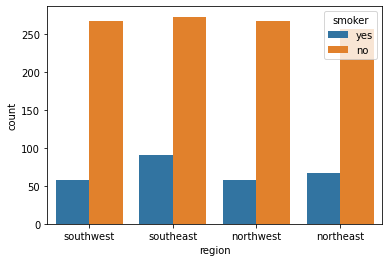

In [31]:
# Visualization

###
sns.countplot(x='region', hue='smoker', data=medcosts)
###


#### 2. Do medical charges vary by smoking status? Print the median `charges` for each value of `smoker`, then visualize this using the plot of your choosing (options include side by side box plots, violin plots, or strip plots, or overlapping histograms or KDE plots).

In [38]:
# 2 

# Calculate median charges by smoking status
###
medcosts.groupby('smoker').charges.median()
###


smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='smoker'>

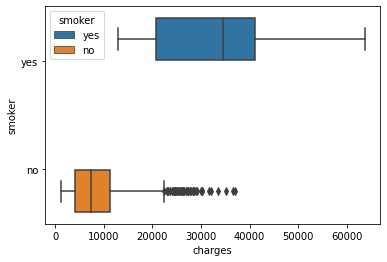

In [39]:
# Visualization

###
sns.boxplot(x='charges',y = 'smoker',hue = 'smoker',data = medcosts)
###


#### 3. What is the relationship between `age` and `charges`? Calculate the correlation between these two columns, then create a scatter plot of `charges` vs. `age`. 

In [40]:
# 3 

# Calculate correlation between age and medical charges
###
medcosts['age'].corr(medcosts['charges'])
###


0.2990081933306476

<AxesSubplot:xlabel='age', ylabel='charges'>

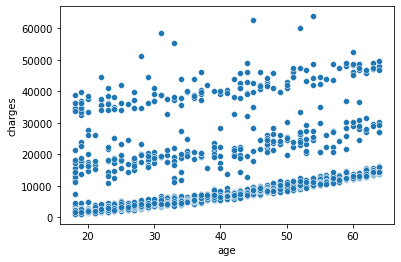

In [41]:
# Scatter plot of age and charges

###
sns.scatterplot(x='age',y='charges',data = medcosts)
###


#### 4. Does the relationship between `age` and `charges` differ by smoking status? Create a new scatter plot of `charges` vs. `age`, colored by `smoker`. What can you learn?

<AxesSubplot:xlabel='age', ylabel='charges'>

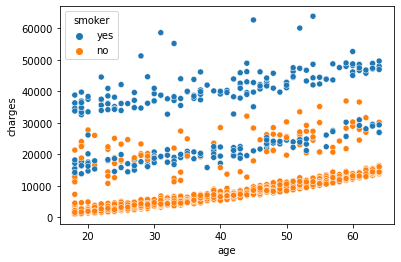

In [42]:
# 4

# Create a scatter plot of charges vs. age
###
sns.scatterplot(x='age',y='charges',hue = 'smoker',data = medcosts)
###
